In [1]:
!pip -q install git+https://github.com/benman1/time-series 

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
explainable-ai-sdk 1.3.2 requires xai-image-widget, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.6 requires google-cloud-bigquery-storage, which is not installed.
yellowbrick 1.4 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
woodwork 0.14.0 requires pandas>=1.3.0, but you have pandas 1.2.5 which is incompatible.
tsfresh 0.19.0 requires statsmodels>=0.13, but you have statsmodels 0.12.2 which is incompatible.
tfx-bsl 1.5.0 requires absl-py<0.13,>=0.9, but you have absl-py 0.15.0 which is incompatible.
tfx-bsl 1.5.0 requires pyarrow<6,>=1, but you have pyarrow 6.0.1 which is incompatible.
tfx-bsl 1.5.0 requires tensorflo

In [2]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

from tensorflow.python.framework.ops import disable_eager_execution
import tensorflow as tf
disable_eager_execution() # for graph mode
tf.compat.v1.experimental.output_all_intermediates(True)

from time_series.utils import evaluate_model
from time_series.dataset.time_series import TrainingDataSet

In [3]:
hundred_ = pd.read_csv("../input/electronic-timeseries/Dataset Experimental/100_h.csv", header = [2])
hundred_.drop("1", axis = 1, inplace = True)
hundred_.set_index("Elapsed time", inplace = True)
hundred_

,current,voltage,power,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,temp_anode_endplate,temp_anode_dewpoint_water,temp_anode_inlet,temp_anode_outlet,temp_cathode_dewpoint_water,temp_cathode_inlet,temp_cathode_outlet,total_anode_stack_flow,total_cathode_stack_flow
Elapsed time,,,,,,,,,,,,,,,,
1.226,0.0,0.9433,0.0,109.901303,110.529453,109.395428,108.792114,83.004883,55.516544,69.586266,37.814960,64.555069,70.225243,56.262810,0.07,0.291
2.226,0.0,0.9430,0.0,110.204828,110.529453,109.597778,108.792114,82.980629,55.490707,69.549232,37.801731,64.592949,70.212616,56.250183,0.07,0.291
3.226,0.0,0.9427,0.0,109.901303,110.529453,109.698953,108.792114,83.004883,55.490707,69.610962,37.828186,64.555069,70.288368,56.275436,0.07,0.291
4.226,0.0,0.9423,0.0,109.901303,110.327250,109.597778,108.893387,82.932320,55.529465,69.536888,37.867867,64.542442,70.300995,56.250183,0.07,0.291
5.226,0.0,0.9423,0.0,109.901303,110.327250,109.800128,108.792114,82.956474,55.464867,69.549232,37.814960,64.580322,70.250496,56.237556,0.07,0.291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179356.226,0.0,0.9288,0.0,109.496603,110.023945,103.514634,102.804370,82.874138,54.829044,70.018578,32.654110,64.807678,70.211578,58.774307,0.07,0.291
179357.226,0.0,0.9288,0.0,109.395428,110.023945,103.628455,102.804370,82.753372,54.841965,69.981125,32.667660,64.795052,70.135826,58.711178,0.07,0.291
179358.226,0.0,0.9284,0.0,109.395428,110.023945,103.830805,103.108188,82.729218,54.841965,70.018578,32.586361,64.769798,70.060074,58.610172,0.07,0.291


In [4]:
tds2 = TrainingDataSet(hundred_)

In [5]:
N_EPOCHS = 50
first_n = 16

## DeepAR

In [6]:
from time_series.models.deepar import DeepAR
ar_model = DeepAR(tds2)
ar_model.instantiate_and_fit(verbose = 1, epochs = N_EPOCHS)

2022-03-31 11:47:46.043541: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:46.135244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:46.135992: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:46.137123: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 16)]          0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 4)             336       
_________________________________________________________________
dense (Dense)                (None, 10, 4)             20        
_________________________________________________________________
main_output (GaussianLayer)  [(None, 10, 16), (None, 1 160       
Total params: 516
Trainable params: 516
Non-trainable params: 0
_________________________________________________________________
Train on 143488 samples


2022-03-31 11:47:49.114866: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:49.116090: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:49.117054: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:49.118182: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-31 11:47:49.119223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/50
143488/143488 [==============================] - 55s 381us/sample - loss: 222.6745 - mean_absolute_percentage_error: 28054436.0000 - mae: 44.6836 - mse: 3322.0671
Epoch 2/50
143488/143488 [==============================] - 53s 371us/sample - loss: 4.4475 - mean_absolute_percentage_error: 31441682.0000 - mae: 19.8517 - mse: 902.3361
Epoch 3/50
143488/143488 [==============================] - 54s 376us/sample - loss: 2.8292 - mean_absolute_percentage_error: 31162558.0000 - mae: 4.2201 - mse: 54.0042
Epoch 4/50
143488/143488 [==============================] - 55s 382us/sample - loss: 1.9111 - mean_absolute_percentage_error: 31021304.0000 - mae: 2.0695 - mse: 14.6017
Epoch 5/50
143488/143488 [==============================] - 54s 378us/sample - loss: 1.1266 - mean_absolute_percentage_error: 31063848.0000 - mae: 1.4615 - mse: 9.5149
Epoch 6/50
143488/143488 [==============================] - 55s 386us/sample - loss: 1.0876 - mean_absolute_percentage_error: 31058788.0000 - mae: 1.

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 9.0678
----------
current: 28.51
voltage: 0.01
power: 14.23
pressure_anode_inlet: 0.07
pressure_anode_outlet: 0.1
pressure_cathode_inlet: 2.62
pressure_cathode_outlet: 2.19
temp_anode_endplate: 0.06
temp_anode_dewpoint_water: 0.01
temp_anode_inlet: 0.05
temp_anode_outlet: 0.18
temp_cathode_dewpoint_water: 0.06
temp_cathode_inlet: 0.12
temp_cathode_outlet: 8.07
total_anode_stack_flow: 0.0
total_cathode_stack_flow: 0.05


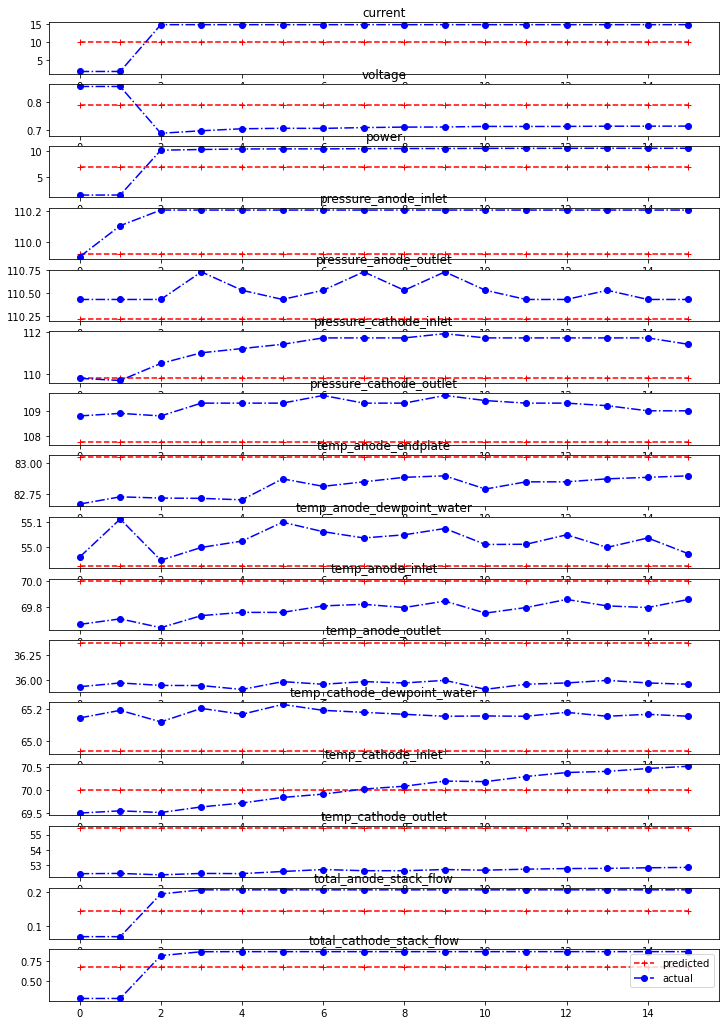

In [7]:
y_predicted_ar = ar_model.model.predict(tds2.X_test)
evaluate_model(
    tds = tds2, 
    y_predicted = y_predicted_ar,
    columns = hundred_.columns, 
    first_n = 16
)

In [8]:
MSE_AR = mean_squared_error(y_predicted_ar.reshape(-1,), tds2.y_test.reshape(-1,))
MAPE_AR  = mean_absolute_percentage_error(y_predicted_ar.reshape(-1,), tds2.y_test.reshape(-1,))
print(f"MSE: {MSE_AR:.4f}")
print(f"MAPE: {MAPE_AR:.4f}")

MSE: 9.0678
MAPE: 0.1796


## LSTM

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 16)]          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 10, 100)           46800     
_________________________________________________________________
dense_1 (Dense)              (None, 10, 16)            1616      
Total params: 48,416
Trainable params: 48,416
Non-trainable params: 0
_________________________________________________________________
None
Train on 143488 samples
Epoch 1/50
143488/143488 [==============================] - 45s 313us/sample - loss: 595.7894 - mean_absolute_percentage_error: 30276300.0000 - mae: 12.2255 - mse: 595.7879
Epoch 2/50
143488/143488 [==============================] - 46s 318us/sample - loss: 17.8530 - mean_absolute_percentage_error: 31396038.0000 - mae: 2.2452 - mse: 17.8530
Epoch 3/50
14

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 1.3247
----------
current: 73.98
voltage: 0.01
power: 33.91
pressure_anode_inlet: 0.04
pressure_anode_outlet: 0.02
pressure_cathode_inlet: 0.89
pressure_cathode_outlet: 0.08
temp_anode_endplate: 0.01
temp_anode_dewpoint_water: 0.01
temp_anode_inlet: 0.02
temp_anode_outlet: 0.02
temp_cathode_dewpoint_water: 0.03
temp_cathode_inlet: 0.16
temp_cathode_outlet: 0.35
total_anode_stack_flow: 0.01
total_cathode_stack_flow: 0.17


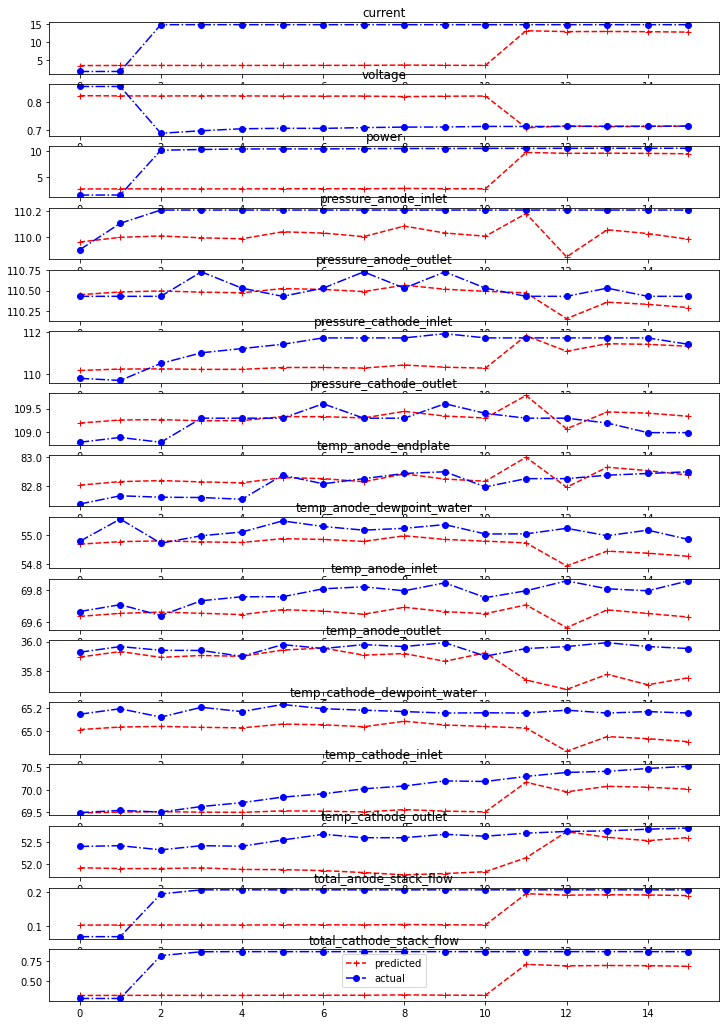

In [9]:
from time_series.models.LSTM import LSTM
lstm = LSTM(tds2)
lstm.instantiate_and_fit(verbose = 1, epochs = N_EPOCHS)
y_predicted_lstm = lstm.model.predict(tds2.X_test)
evaluate_model(
    tds = tds2, 
    y_predicted = y_predicted_lstm,
    columns = hundred_.columns, 
    first_n = first_n
)

In [10]:
MSE_LSTM = mean_squared_error(y_predicted_lstm.reshape(-1,), tds2.y_test.reshape(-1,))
MAPE_LSTM  = mean_absolute_percentage_error(y_predicted_lstm.reshape(-1,), tds2.y_test.reshape(-1,))
print(f"MSE: {MSE_LSTM:.4f}")
print(f"MAPE: {MAPE_LSTM:.4f}")

MSE: 1.3247
MAPE: 0.0941


## Transformer

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 10, 16)]     0                                            
__________________________________________________________________________________________________
multi_head_attention (MultiHead (None, 10, 16)       34320       input_3[0][0]                    
                                                                 input_3[0][0]                    
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 10, 16)       0           multi_head_attention[0][0]       
__________________________________________________________________________________________________
layer_normalization (LayerNorma (None, 10, 16)       32          dropout_1[0][0]            

2022-03-31 13:18:18.906718: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


143488/143488 [==============================] - 39s 272us/sample - loss: 4784.9119 - mean_absolute_percentage_error: 100.2344 - mae: 55.6991 - mse: 4784.9072
Epoch 2/50
143488/143488 [==============================] - 34s 237us/sample - loss: 4784.9113 - mean_absolute_percentage_error: 99.6283 - mae: 55.6992 - mse: 4784.9136
Epoch 3/50
143488/143488 [==============================] - 34s 239us/sample - loss: 4784.9113 - mean_absolute_percentage_error: 99.6282 - mae: 55.6992 - mse: 4784.9019
Epoch 4/50
143488/143488 [==============================] - 34s 234us/sample - loss: 4784.9113 - mean_absolute_percentage_error: 99.6282 - mae: 55.6991 - mse: 4784.9087
Epoch 5/50
143488/143488 [==============================] - 34s 236us/sample - loss: 4784.9113 - mean_absolute_percentage_error: 99.6281 - mae: 55.6991 - mse: 4784.9111
Epoch 6/50
143488/143488 [==============================] - 34s 234us/sample - loss: 4784.9113 - mean_absolute_percentage_error: 99.6282 - mae: 55.6992 - mse: 4784.9

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


MSE: 4777.2306
----------
current: 192.51
voltage: 0.53
power: 96.42
pressure_anode_inlet: 12139.54
pressure_anode_outlet: 12213.98
pressure_cathode_inlet: 12387.88
pressure_cathode_outlet: 11926.85
temp_anode_endplate: 6858.05
temp_anode_dewpoint_water: 3027.93
temp_anode_inlet: 4868.63
temp_anode_outlet: 1292.77
temp_cathode_dewpoint_water: 4247.09
temp_cathode_inlet: 4902.04
temp_cathode_outlet: 2766.39
total_anode_stack_flow: 0.04
total_cathode_stack_flow: 0.66


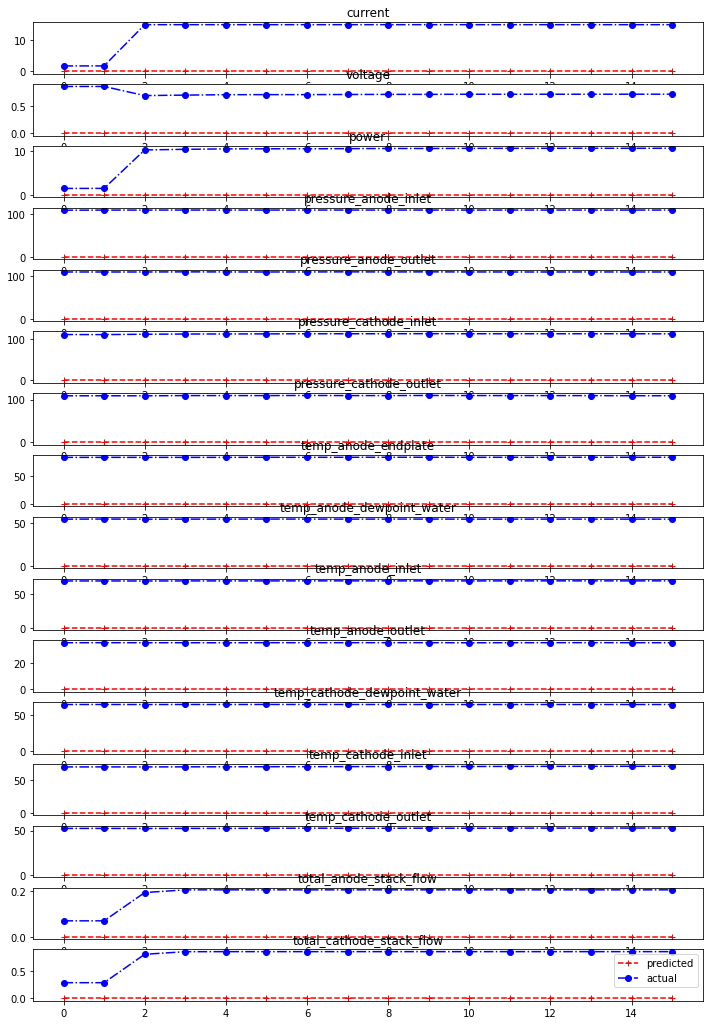

In [11]:
from time_series.models.transformer import Transformer
trans = Transformer(tds2)
trans.instantiate_and_fit(verbose = 1, epochs = N_EPOCHS)
y_predicted_trans = trans.model.predict(tds2.X_test)
evaluate_model(
    tds = tds2, 
    y_predicted = y_predicted_trans,
    columns = hundred_.columns, 
    first_n = first_n
)

In [12]:
MSE_TRANS = mean_squared_error(y_predicted_trans.reshape(-1,), tds2.y_test.reshape(-1,))
MAPE_TRANS  = mean_absolute_percentage_error(y_predicted_trans.reshape(-1,), tds2.y_test.reshape(-1,))
print(f"MSE: {MSE_TRANS:.4f}")
print(f"MAPE: {MAPE_TRANS:.4f}")

MSE: 4777.2306
MAPE: 247477598433183840.0000


## TCN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn (TCN)                    (None, 64)                140096    
_________________________________________________________________
dense_4 (Dense)              (None, 160)               10400     
_________________________________________________________________
reshape (Reshape)            (None, 10, 16)            0         
Total params: 150,496
Trainable params: 150,496
Non-trainable params: 0
_________________________________________________________________
Train on 143488 samples
Epoch 1/50
143488/143488 [==============================] - 42s 295us/sample - loss: 41.7343 - mean_absolute_percentage_error: 23934556.0000 - mae: 1.5726 - mse: 41.7343
Epoch 2/50
143488/143488 [==============================] - 42s 290us/sample - loss: 1.8188 - mean_absolute_percentage_error: 18229784.0000 - mae: 0.7386 - mse: 1.8188
Epoch 3/50
143488/

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[0.9775700840998677, 13335810.0, 0.2982354, 0.97756916]
MSE: 0.9776
----------
current: 58.76
voltage: 0.01
power: 29.52
pressure_anode_inlet: 0.01
pressure_anode_outlet: 0.02
pressure_cathode_inlet: 1.22
pressure_cathode_outlet: 0.18
temp_anode_endplate: 0.04
temp_anode_dewpoint_water: 0.01
temp_anode_inlet: 0.01
temp_anode_outlet: 0.0
temp_cathode_dewpoint_water: 0.01
temp_cathode_inlet: 0.06
temp_cathode_outlet: 0.04
total_anode_stack_flow: 0.01
total_cathode_stack_flow: 0.15


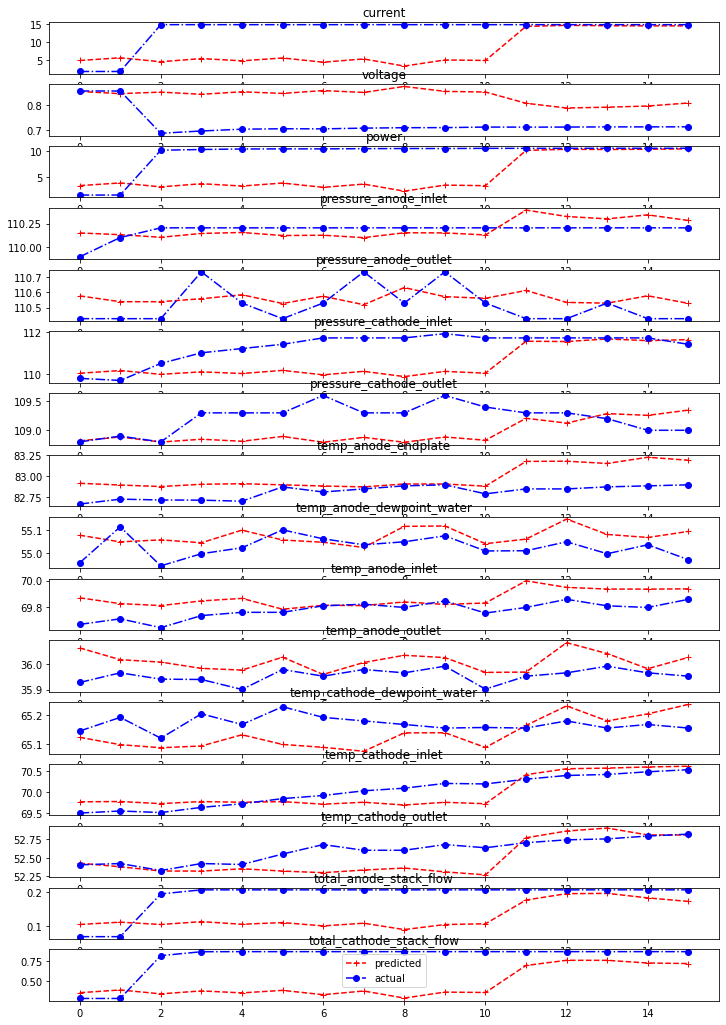

In [13]:
from time_series.models.TCN import TCNModel
tcn_model = TCNModel(tds2)
tcn_model.instantiate_and_fit(verbose=1, epochs = N_EPOCHS)
print(tcn_model.model.evaluate(tds2.X_test, tds2.y_test))
y_predicted_tcn = tcn_model.model.predict(tds2.X_test)
evaluate_model(
    tds = tds2, 
    y_predicted = y_predicted_tcn,
    columns = hundred_.columns, 
    first_n = first_n
)

In [14]:
MSE_TCN = mean_squared_error(y_predicted_tcn.reshape(-1,), tds2.y_test.reshape(-1,))
MAPE_TCN  = mean_absolute_percentage_error(y_predicted_tcn.reshape(-1,), tds2.y_test.reshape(-1,))
print(f"MSE: {MSE_TCN:.4f}")
print(f"MAPE: {MAPE_TCN:.4f}")

MSE: 0.9776
MAPE: 0.0891


## Comparación

In [15]:
dic = {
    "Models": ["DeepAR", "LSTM", "Transformer", "TCN"],
    "MSE (metric)": [MSE_AR, MSE_LSTM, MSE_TRANS, MSE_TCN],
    "MAPE (metric)": [MAPE_AR, MAPE_LSTM, MAPE_TRANS, MAPE_TCN]
}

In [16]:
informe = pd.DataFrame(dic)
informe

,Models,MSE (metric),MAPE (metric)
0,DeepAR,9.067822,1.795720e-01
1,LSTM,1.324697,9.413592e-02
2,Transformer,4777.230634,2.474776e+17
3,TCN,0.977570,8.907829e-02


In [17]:
!pip install openpyxl

     |████████████████████████████████| 242 kB 290 kB/s            


In [18]:
informe.to_excel("informe.xlsx", index = False)

In [19]:
ar_model.model.count_params()

516